<a href="https://colab.research.google.com/github/Dan-Analyst/DATA_ANALYSIS_-PROJECTS/blob/main/Data%20cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#%% --------------------------
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


path="/content/drive/MyDrive/New_York_2025/New York 2025.csv"
df=pd.read_csv(path)
print(df.head(10))


        id                                               name  host_id  \
0   2595.0                    Skylit Midtown Castle Sanctuary     2845   
1   6848.0                   Only 2 stops to Manhattan studio    15991   
2   6872.0  Uptown Sanctuary w/ Private Bath (Month to Month)    16104   
3   6990.0                            UES Beautiful Blue Room    16800   
4   7064.0  Amazing location! Wburg. Large, bright & tranquil    17297   
5   7097.0      Perfect for Your Parents, With Garden & Patio    17571   
6   7801.0                 Sunny Williamsburg Loft with Sauna    21207   
7   8490.0   Maison des Sirenes1,bohemian, luminous apartment    25183   
8   9357.0                               Midtown Pied-a-terre    30193   
9  10452.0                      Radiant Oasis  B&B Style room    35935   

        host_name neighbourhood_group       neighbourhood   latitude  \
0        Jennifer           Manhattan             Midtown  40.753560   
1   Allen & Irina            Brooklyn    

In [11]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id                                    0
name                                  2
host_id                               0
host_name                             6
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9486
reviews_per_month                  9486
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           29530
has_license                           0
dtype: int64


In [25]:

# Handling missing values - options:
# Option 1: Fill missing values with the mean (numerical data)
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)



In [26]:
# Print the number of duplicates
print("Number of duplicate entries:", df.duplicated().sum())


Number of duplicate entries: 0


In [27]:
# Example: Convert all string data to lowercase (if applicable)
# df['text_column'] = df['text_column'].str.lower()

# Standardize date formats (if applicable)
# df['date_column'] = pd.to_datetime(df['date_column'], format='%Y-%m-%d')

# Standardize numerical formats (if needed)
# df['numerical_column'] = pd.to_numeric(df['numerical_column'], errors='coerce')


In [28]:
# 5. Handle Outliers
# Remove price outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

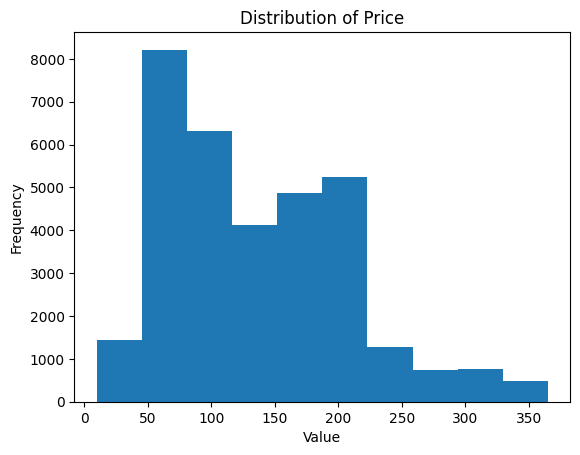

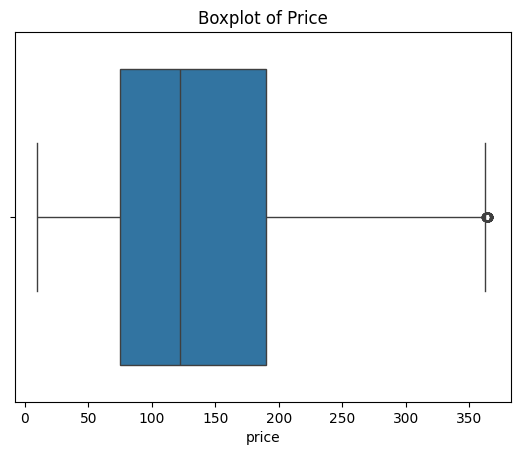

In [29]:
# Histogram of numerical data
plt.hist(df['price'])
plt.title('Distribution of Price')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Boxplot to view outliers
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()


In [30]:
print("Final dataset preview:")
print(df.head())
print("Dataset shape:", df.shape)

Final dataset preview:
       id                                               name  host_id  \
0  2595.0                    Skylit Midtown Castle Sanctuary     2845   
1  6848.0                   Only 2 stops to Manhattan studio    15991   
2  6872.0  Uptown Sanctuary w/ Private Bath (Month to Month)    16104   
3  6990.0                            UES Beautiful Blue Room    16800   
4  7064.0  Amazing location! Wburg. Large, bright & tranquil    17297   

       host_name neighbourhood_group neighbourhood  latitude  longitude  \
0       Jennifer           Manhattan       Midtown  40.75356  -73.98559   
1  Allen & Irina            Brooklyn  Williamsburg  40.70935  -73.95342   
2      Kahshanna           Manhattan   East Harlem  40.80107  -73.94255   
3            Cyn           Manhattan   East Harlem  40.78778  -73.94759   
4         Joelle            Brooklyn  Williamsburg  40.71248  -73.95881   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire H

In [31]:
# Save cleaned data
df.to_csv('Cleaned_New_York_2025.csv', index=False)

print("Data cleaning complete! Final shape:", df.shape)

Data cleaning complete! Final shape: (33455, 19)
